# Data cleaning

### Loading data

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from fastai.imports import *


#Import
data = pd.read_csv('dataset_mood_smartphone.csv', parse_dates=['time'])

#Convert time column to date time format
data['time'] = pd.to_datetime(data['time']) 

### Changing to multi index with time and ID

In [2]:
data = data.set_index(['id', 'time'])

We want to reformat the data such that we have a number of observations for each patient, with each observation consisting of some time period e.g one week. Each observation will have a measurement for each attribute (e.g., Avg time spent on weather app over period) with the dependent variable as the average mood over the period. 

In [3]:
#reshaping the dataframe so that each column is a feature, indexed first by patient then time
pivoted_table = pd.pivot_table(data, index=['id', 'time'], columns='variable', values='value')
data2 = pivoted_table

### Compile the data into observations for each mood measurement
It seems like im loosing some of the starting bits of the data here.  Im a  bit confused as to why.... It might be that id doesnt exist for the other index other than the first.  This needs to be explored.  

In [4]:
import copy

#Make copy of data
data3 = copy.deepcopy(pivoted_table)

#Setup new frame
df = pd.DataFrame(columns=data3.columns)

df.insert(0,'time', "")
df.insert(0,'id', "")
df_lost = copy.deepcopy(df)

prev_id = data3.index[0][0]
i_prev = 0
ave_list = ['circumplex.arousal', 'mood', 'circumplex.valence']

tmp = []
for i in range(0, len(data3)):
    if data3.index[i][0] != prev_id:
        for k in range(i_prev, i):
            tmp.append(data3.index[i_prev][0])
            tmp.append(data3.index[k][1])
            for j in range(0, len(data3.columns)):
                tmp.append(data3.iloc[k,j])
            #print(len(tmp))
            df_lost.loc[len(df_lost)] = tmp
            tmp = []
        i_prev = i
        prev_id = data3.index[i][0]
    if not pd.isnull(data3['mood'].iloc[i]):
        tmp.append(data3.index[i_prev][0])
        tmp.append(data3.index[i][1])
        for j in range(0, len(data3.columns)):
            if any(data3.columns[j] in s for s in ave_list):
                tmp.append(data3.iloc[i_prev:i+1,j].mean())
            else:
                tmp.append(data3.iloc[i_prev:i+1,j].sum())
        df.loc[len(df)] = tmp
        tmp = []
        i_prev = i+1
        
df = df.set_index(['id', 'time'])
df

variable                     activity  appCat.builtin  appCat.communication  \
id      time                                                                  
AS14.01 2014-02-26 13:00:00  0.000000           0.000                 0.000   
        2014-02-26 15:00:00  0.000000           0.000                 0.000   
        2014-02-26 18:00:00  0.000000           0.000                 0.000   
        2014-02-26 21:00:00  0.000000           0.000                 0.000   
        2014-02-27 09:00:00  0.000000           0.000                 0.000   
        2014-02-27 12:00:00  0.000000           0.000                 0.000   
        2014-02-27 15:00:00  0.000000           0.000                 0.000   
        2014-03-21 09:00:00  0.238190         496.208              2300.541   
        2014-03-21 11:00:00  0.065054         587.566              1794.749   
        2014-03-21 15:00:00  1.931720         979.241              1488.071   
        2014-03-21 19:00:00  0.766375         147.965              1197.682   
        2014-03-21 21:00:00  0.244908         992.003              1626.808   
        2014-03-22 08:00:00  0.125000         185.214                41.268   
        2014-03-22 12:00:00  1.266726         152.193               955.898   
        2014-03-22 15:00:00  0.997899         273.741              1286.108   
        2014-03-22 18:00:00  1.073637         206.869               620.015   
        2014-03-22 21:00:00  0.310154          95.565              1979.698   
        2014-03-23 10:00:00  0.284211          13.095               121.199   
        2014-03-23 12:00:00  0.075630         107.658               274.379   
        2014-03-23 15:00:00  0.655730         261.738              1989.821   
        2014-03-23 19:00:00  0.482070         194.062               523.541   
        2014-03-23 21:00:00  0.590870         561.574               588.399   
        2014-03-24 09:00:00  0.261920         371.746              2194.162   
        2014-03-24 12:00:00  0.253261         186.009              2859.521   
        2014-03-24 15:00:00  0.775228          81.726               193.515   
        2014-03-24 18:00:00  0.453782         256.355              1320.211   
        2014-03-24 21:00:00  0.194061          71.204              1914.992   
        2014-03-25 09:00:00  0.229301         216.922              2902.225   
        2014-03-25 15:00:00  1.332082          72.514              2658.167   
        2014-03-25 20:00:00  0.649403         460.854              1627.391   
...                               ...             ...                   ...   
AS14.33 2014-05-24 18:00:00  0.125210         100.183               210.155   
        2014-05-24 23:00:00  0.067227           7.034               502.099   
        2014-05-25 11:00:00  3.352771        1344.815              1436.688   
        2014-05-25 12:00:00  0.076923         668.880                 0.000   
        2014-05-25 15:00:00  0.043103          93.781               227.788   
        2014-05-25 21:00:00  0.220815         302.743               673.971   
        2014-05-26 10:00:00  0.404749         410.311               650.445   
        2014-05-26 14:00:00  0.634508         131.317               160.498   
        2014-05-26 15:00:00  0.245763         422.549                67.264   
        2014-05-26 18:00:00  0.213034         339.385               804.701   
        2014-05-26 21:00:00  0.019767          93.739               122.790   
        2014-05-27 10:00:00  0.109244          97.924               559.010   
        2014-05-27 13:00:00  0.017241         239.131               813.081   
        2014-05-27 15:00:00  0.075000          14.083                27.093   
        2014-05-27 18:00:00  0.000000          21.088               243.493   
        2014-05-27 21:00:00  0.060682          49.860                92.525   
        2014-05-28 09:00:00  0.710264         446.997               409.440   
        2014-05-28 14:00:00  1.223313        1062.

### Aggregating the data into daily windows for each patient

For all of the apps, sms and calls we take the sum over the windows, since they are either times spent or number of calls etc. For arousal, mood and valence we take the mean.

In [4]:
#This is currently grouping observations into 2 day windows, can make a decision on this later
data2 = data2.astype(float)
data2 = data2.groupby([pd.Grouper(level='id'), pd.Grouper(freq='2D', level='time') 
                             ]).agg({'activity': 'sum', 'appCat.builtin':'sum',
                                                           'appCat.communication':'sum', 'appCat.entertainment':'sum',
                                                           'appCat.finance':'sum', 'appCat.game':'sum', 'appCat.office':'sum',
                                                           'appCat.other':'sum', 'appCat.social':'sum', 'appCat.travel':'sum',
                                                           'appCat.unknown':'sum', 'appCat.utilities':'sum', 'appCat.weather':'sum',
                                                           'call':'sum', 'screen':'sum', 'sms':'sum','circumplex.valence':'mean',
                                                           'circumplex.arousal':'mean', 'mood':'mean'})


### Removing observations/days without mood measurements

In [5]:
data2 = data2.dropna(subset=['mood'])

### Remove outliers

It is clear from the plots that there are some outliers that are nonsensical. No values should be negative apart from those for arousal or valence, which have a minimum value of -2. Therefore a good starting point is to remove any values which are less than that for the whole dataframe.

In [6]:
from scipy import stats

data2 = data2.astype(float)
data2 = data2[(np.abs(stats.zscore(data2)) < 4).all(axis=1)]

In [21]:

df = df.astype(float)
df = df[(np.abs(stats.zscore(df)) < 4).all(axis=1)]

df

C:\Users\corma\Anaconda3\lib\site-packages\scipy\stats\stats.py:2247: RuntimeWarning: Mean of empty slice.
  mns = a.mean(axis=axis)
C:\Users\corma\Anaconda3\lib\site-packages\numpy\core\_methods.py:78: RuntimeWarning: invalid value encountered in true_divide
  ret, rcount, out=ret, casting='unsafe', subok=False)
C:\Users\corma\Anaconda3\lib\site-packages\numpy\core\_methods.py:140: RuntimeWarning: Degrees of freedom <= 0 for slice
  keepdims=keepdims)
C:\Users\corma\Anaconda3\lib\site-packages\numpy\core\_methods.py:110: RuntimeWarning: invalid value encountered in true_divide
  arrmean, rcount, out=arrmean, casting='unsafe', subok=False)
C:\Users\corma\Anaconda3\lib\site-packages\numpy\core\_methods.py:130: RuntimeWarning: invalid value encountered in true_divide
  ret, rcount, out=ret, casting='unsafe', subok=False)


,variable,activity,appCat.builtin,appCat.communication,appCat.entertainment,appCat.finance,appCat.game,appCat.office,appCat.other,appCat.social,appCat.travel,appCat.unknown,appCat.utilities,appCat.weather,call,circumplex.arousal,circumplex.valence,mood,screen,sms
id,time,,,,,,,,,,,,,,,,,,,


### Dropping columns with little data

In [6]:
#Maybe we should only do this once initial models have been run

#data2 = data2.drop(columns=['appCat.finance','appCat.game', 'appCat.unknown', 'appCat.weather'])

# Feature engineering

Here we need to create new variables to improve our predictive power

Ideas so far:
- Days of week, month of recording
- Mood swing in last week
- Mornging/evening
- Binary indicators for some ommitted apps

In the paper on this dataset they say that basically none of the apps have any predictive power - once we show this 
#ourselves we could simplify the model down immensely using principle components/ indicators for 
"uses phone a lot-or not" 

### Day of week indicators

##### Daily data

In [7]:
names = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']

#For the daily aggregated data
for i, x in enumerate(names):
    #print(i)
    data2[x] = (data2.index.get_level_values(1).weekday == i).astype(int)
       
#For the mood measurement data
for i, x in enumerate(names):
    #print(i)
    df[x] = (df.index.get_level_values(1).weekday == i).astype(int)


NameError: name 'df' is not defined

### Month indicators

In [8]:
months = ['January', 'February', 'March', 'April', 'May', 'June', 'July', 'August', 'September', 'October', 'November', 'December']

for i, x in enumerate(months):
    data2[x] = ((data2.index.get_level_values(1).month -1) == i).astype(int)

for i, x in enumerate(months):
    #print(i)
    df[x] = ((df.index.get_level_values(1).month -1) == i).astype(int)

NameError: name 'df' is not defined

In [9]:
#Since we know that our data only occurs in Feb-July
data2.drop(columns=['January', 'August', 'September', 'October', 'November', 'December'], inplace=True)

df.drop(columns=['January', 'August', 'September', 'October', 'November', 'December'], inplace=True)

NameError: name 'df' is not defined

### Mood swing indicator

### Amsterdam weather

### Was it a Dutch national holiday

# Exploration

### Mood distribution 

In [ ]:
#We can now look at the distributions for each variable
data2.hist('mood')

# Plot of average mood against time

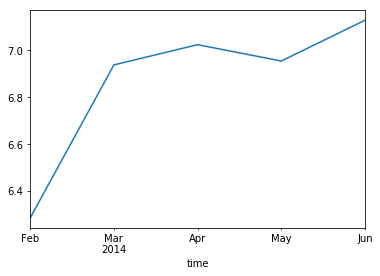

In [26]:
time_data = data2

time_data = time_data.reset_index('id')
time_data.drop(columns=['id'], axis=1, inplace=True)

time_data.resample('3D').mean()

time_data = time_data.groupby(pd.Grouper(freq='M', level='time') 
                             ).agg({'activity': 'sum', 'appCat.builtin':'sum',
                                                           'appCat.communication':'sum', 'appCat.entertainment':'sum',
                                                           'appCat.finance':'sum', 'appCat.game':'sum', 'appCat.office':'sum',
                                                           'appCat.other':'sum', 'appCat.social':'sum', 'appCat.travel':'sum',
                                                           'appCat.unknown':'sum', 'appCat.utilities':'sum', 'appCat.weather':'sum',
                                                           'call':'sum', 'screen':'sum', 'sms':'sum','circumplex.valence':'mean',
                                                           'circumplex.arousal':'mean', 'mood':'mean'})

time_data.mood.plot()

### Observation counts for each day

In [5]:
#This tells us the number of individuals for which we have mood data for each day in the dataset
data2.groupby(level=0)['mood'].count()

id
AS14.01    221
AS14.02    157
AS14.03    221
AS14.05    241
AS14.06    202
AS14.07    192
AS14.08    299
AS14.09    197
AS14.12    183
AS14.13    244
AS14.14    164
AS14.15    269
AS14.16    230
AS14.17    236
AS14.19    221
AS14.20    202
AS14.23    159
AS14.24    238
AS14.25    129
AS14.26    329
AS14.27    199
AS14.28    167
AS14.29    187
AS14.30    224
AS14.31    198
AS14.32    128
AS14.33    191
Name: mood, dtype: int64

It is clear that there is a narrow time period over which we have data for all patients simulatneously. We cannot do much with days for which we little or no mood data, therefore we could consider discarding data in the early and late periods.

### Observation counts for each patient 

In [28]:
data2 = data2.groupby(pd.Grouper(freq='1D', level='time') 
                             ).agg({'activity': 'sum', 'appCat.builtin':'sum',
                                                           'appCat.communication':'sum', 'appCat.entertainment':'sum',
                                                           'appCat.finance':'sum', 'appCat.game':'sum', 'appCat.office':'sum',
                                                           'appCat.other':'sum', 'appCat.social':'sum', 'appCat.travel':'sum',
                                                           'appCat.unknown':'sum', 'appCat.utilities':'sum', 'appCat.weather':'sum',
                                                           'call':'sum', 'screen':'sum', 'sms':'sum','circumplex.valence':'mean',
                                                           'circumplex.arousal':'mean', 'mood':'mean'})

In [30]:
#This tells us the number of mood observations for each individual
data2.groupby(level=1)['mood'].count().hist()

98

### Counts for each variable, for each patient

In [12]:
#Number of available instances for each variable, for each patient
data2.groupby(level=1).count()

,activity,appCat.builtin,appCat.communication,appCat.entertainment,appCat.finance,appCat.game,appCat.office,appCat.other,appCat.social,appCat.travel,appCat.unknown,appCat.utilities,appCat.weather,call,screen,sms,circumplex.valence,circumplex.arousal,mood
time,,,,,,,,,,,,,,,,,,,
2014-02-25,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1
2014-02-27,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1
2014-03-03,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1
2014-03-05,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1
2014-03-07,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2
2014-03-09,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2
2014-03-11,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2
2014-03-13,4,4,4,4,4,4,4,4,4,4,4,4,4,4,4,4,4,4,4
2014-03-15,6,6,6,6,6,6,6,6,6,6,6,6,6,6,6,6,6,6,6


There are a number of attributes for which we have few or no measurements for many of the patients, namely: Finance, Games, office, unknown, and weather. In some of these cases they may be entirely useless, especially if they happen to be highly correlated with other variables. We could consider taking binary indicators for some of these, with the intuition that if they check finance or office apps they have assets or a job, if they check the weather app they go outside, if they play mobile games they procrastinate etc

### Pairwise plots

Looking at the number of non-zero observations in each column after the above transformations

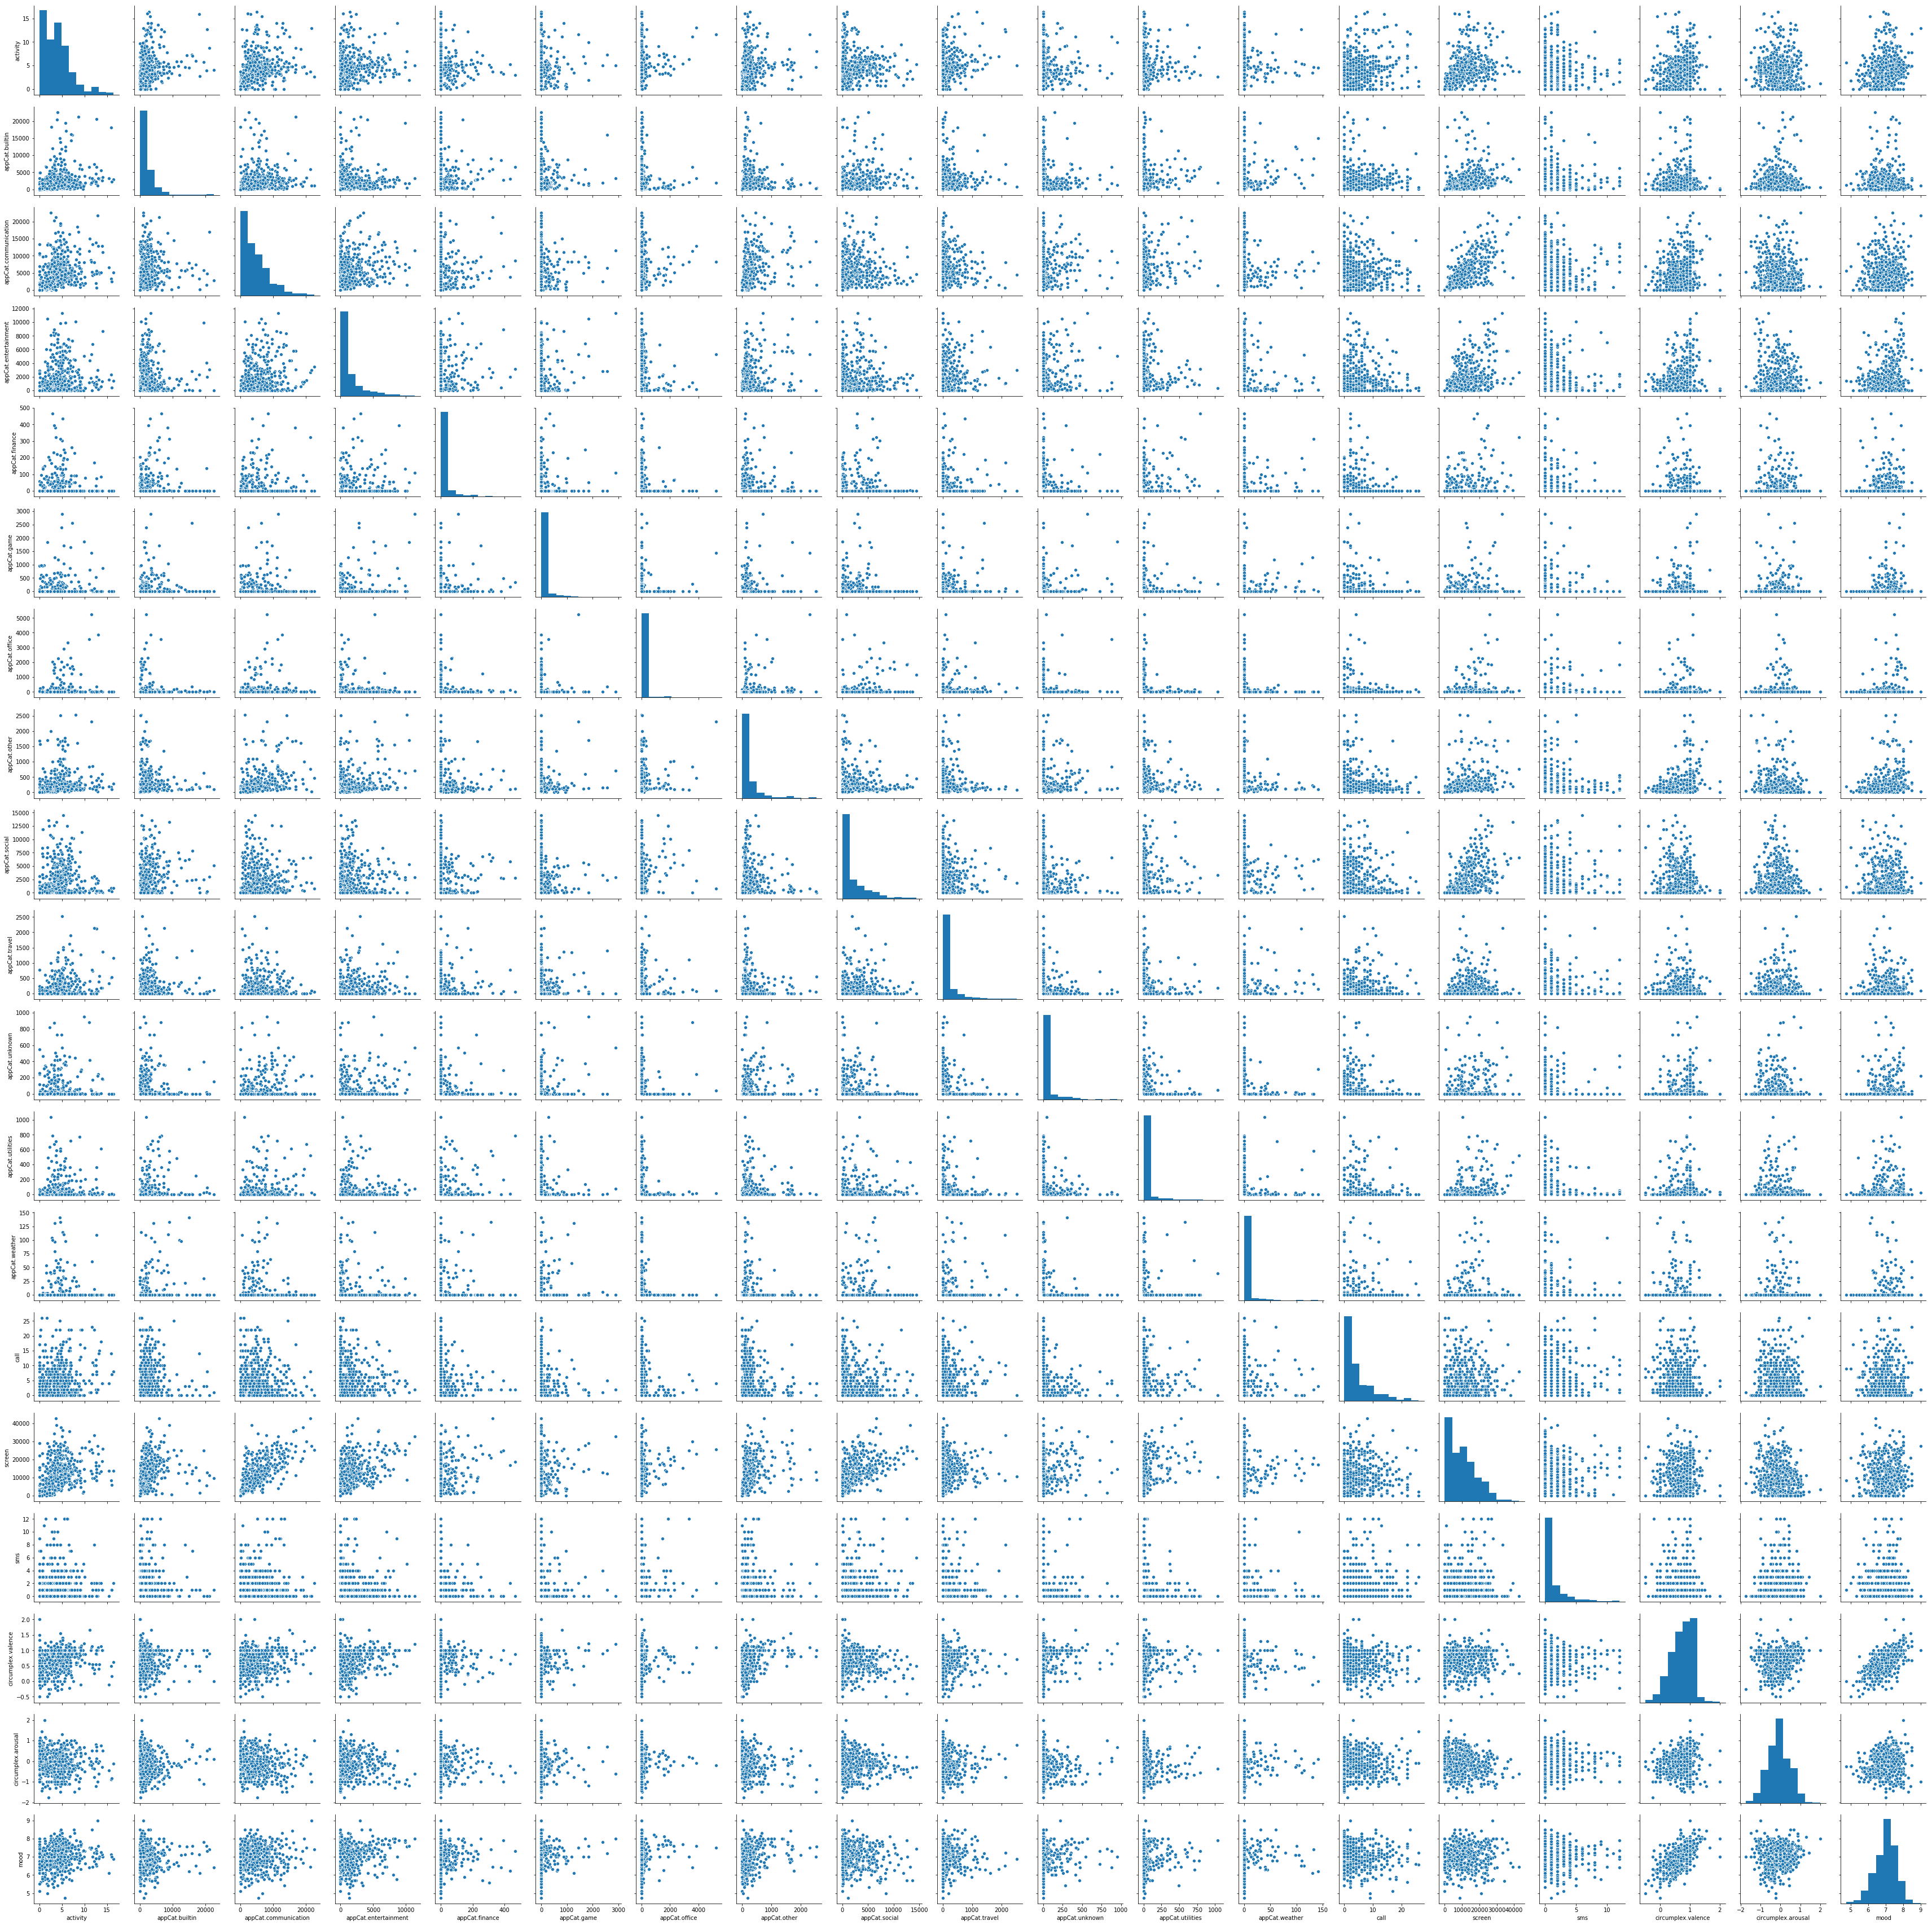

In [14]:
import seaborn as sns

sns.pairplot(data2.loc[:,data2.dtypes == 'float64'])

Valence appears to be multivariate gaussian - others seem to be just noise so will decompose into principal components

### Correlation between predictors

In [30]:
corr_matrix_data2 = data2.corr()
corr_matrix_data2['mood']

activity                0.180628
appCat.builtin         -0.026700
appCat.communication    0.094045
appCat.entertainment    0.173209
appCat.finance         -0.001227
appCat.game             0.106331
appCat.office           0.133556
appCat.other            0.185881
appCat.social          -0.064190
appCat.travel          -0.000182
appCat.unknown          0.058620
appCat.utilities        0.045382
appCat.weather          0.023745
call                   -0.032558
screen                  0.052388
sms                    -0.024257
circumplex.valence      0.605228
circumplex.arousal      0.083430
mood                    1.000000
Monday                 -0.027845
Tuesday                -0.076591
Wednesday              -0.025908
Thursday                0.006783
Friday                  0.049644
Saturday                0.070076
Sunday                  0.002590
February               -0.069292
March                  -0.025252
April                   0.057856
May                    -0.038070
June      

In [12]:
corr_matrix_df = df.corr()
corr_matrix_df['mood']

variable
activity                0.088298
appCat.builtin          0.019294
appCat.communication    0.004243
appCat.entertainment    0.035803
appCat.finance          0.003718
appCat.game             0.029919
appCat.office           0.010850
appCat.other            0.026382
appCat.social          -0.038756
appCat.travel           0.020523
appCat.unknown          0.010087
appCat.utilities        0.011517
appCat.weather          0.035428
call                   -0.004268
circumplex.arousal      0.148204
circumplex.valence      0.700555
mood                    1.000000
screen                  0.007476
sms                    -0.008320
Monday                 -0.026291
Tuesday                -0.028179
Wednesday              -0.031688
Thursday               -0.016566
Friday                  0.004646
Saturday                0.085505
Sunday                  0.012227
February               -0.024229
March                  -0.027765
April                   0.037119
May                    -0.017499
J

# Clustering analysis

### Average data for each individual

In [25]:
cluster = data2.groupby(level='id').agg({'activity': 'sum', 'appCat.builtin':'sum',
                                                           'appCat.communication':'sum', 'appCat.entertainment':'sum',
                                                           'appCat.finance':'sum', 'appCat.game':'sum', 'appCat.office':'sum',
                                                           'appCat.other':'sum', 'appCat.social':'sum', 'appCat.travel':'sum',
                                                           'appCat.unknown':'sum', 'appCat.utilities':'sum', 'appCat.weather':'sum',
                                                           'call':'sum', 'screen':'sum', 'sms':'sum','circumplex.valence':'mean',
                                                           'circumplex.arousal':'mean', 'mood':'mean'})

cluster_data = cluster[['mood', 'screen', 'activity']]

cluster_data


,mood,screen,activity
id,,,
AS14.01,6.987083,401154.381999,74.459016
AS14.02,6.712421,155143.844998,168.284682
AS14.03,7.608115,172189.978994,103.463804
AS14.05,6.841499,266151.237003,78.840075
AS14.06,7.155787,321803.618001,125.075460
AS14.07,6.238080,386245.072006,67.272995
AS14.08,6.751554,87036.496997,61.411512
AS14.09,6.918027,140769.455005,46.085594
AS14.12,6.218745,267870.740004,103.692874


[0 1 1 2 2 0 1 1 2 0 1 1 1 2 1 1 2 2 2 2 1 2 2 0 1 2 0]


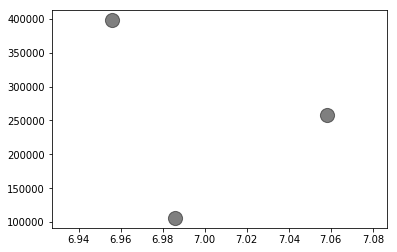

In [26]:
from sklearn.cluster import KMeans

kmeans = KMeans(n_clusters=3).fit(cluster_data)
y_kmeans = kmeans.predict(cluster_data)

print(kmeans.labels_)

# plt.scatter(kmeans.labels_)

#plt.scatter(cluster_data[:, 0], cluster_data[:, 1], c=y_kmeans, s=50, cmap='viridis')

centers = kmeans.cluster_centers_

plt.figure()
plt.scatter(centers[:, 0], centers[:, 1], c='black', s=200, alpha=0.5)
# plt.scatter(cluster_data.mood, cluster_data.screen, cluster_data.circumplex.valence)

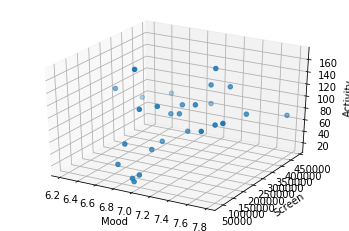

In [27]:
from mpl_toolkits.mplot3d import Axes3D
%matplotlib inline

fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')

ax.scatter(cluster_data.mood, cluster_data.screen, cluster_data.activity)

ax.set_xlabel('Mood')
ax.set_ylabel('Screen')
ax.set_zlabel('Activity')

plt.show()

In [29]:
plt.scatter(data2[:, 0], data2[:, 1], c=y_kmeans, s=50, cmap='viridis')

TypeError: '(slice(None, None, None), 0)' is an invalid key

# Generate train and test sets using random sampling

In [34]:
#This randomly selects a subset of the data to be test set - currently just one test set

def create_sets(dataframe, train_proportion, daily):
    
    if daily == True:
        dataframe = dataframe.reset_index(['id', 'time'])
        
    rand_indices = list(np.random.randint(len(dataframe), size=int(len(dataframe)*(1-train_proportion))))
    test = dataframe[dataframe.index.isin(rand_indices)]
    train = dataframe.drop(rand_indices, axis=0)
    
    if daily == True:
        train.set_index(['id', 'time'], inplace=True)
        test.set_index(['id', 'time'], inplace=True)
    
    return train, test


# Evaluation metrics

In [35]:
def rmse(x,y): return math.sqrt(((x-y)**2).mean())

def print_score(m, X_train, y_train, X_test, y_test):
    res = ['RMSE on training: ', rmse(m.predict(X_train), y_train), 'RMSE on test: ', rmse(m.predict(X_test), y_test), 
           'R^2 on training: ',  m.score(X_train, y_train), 'R^2 on test: ', m.score(X_test, y_test)]
    if hasattr(m, 'oob_score_'): res.append(m.oob_score_)
    print(res)

# Mean model - Benchmark

In [ ]:
def mean_model(dataframe):
    
    

# Linear regression

#### Mood observations - Model

In [31]:
from sklearn.linear_model import LinearRegression

reg_train, reg_test = create_sets(df, 0.8, True)

X_reg_train = reg_train.drop('mood', axis=1)
y_reg_train = reg_train.mood

X_reg_test = reg_test.drop('mood', axis=1)
y_reg_test = reg_test.mood

X_reg_train.shape, y_reg_train.shape, X_reg_test.shape

mood_reg = LinearRegression().fit(X_reg_train, y_reg_train)

mood_reg.score()



ValueError: Input contains NaN, infinity or a value too large for dtype('float64').

####  Mood observations - Prediction

#### Daily - Model

In [43]:
import statsmodels.api as sm

reg_train, reg_test = create_sets(data2, 0.8, True)

X_reg_train = reg_train.drop('mood', axis=1)
y_reg_train = reg_train.mood

X_reg_test = reg_test.drop('mood', axis=1)
y_reg_test = reg_test.mood

X_reg_train.shape, y_reg_train.shape, X_reg_test.shape



X2 = sm.add_constant(X_reg_train)
est = sm.OLS(y_reg_train, X2).fit()
print(est.summary())


#Compare coefficients with scikitlearn 
daily_reg_model = LinearRegression().fit(X_reg_train, y_reg_train)

print('Scikitlearn output: ')

print('Intercept: ', daily_reg_model.intercept_) 
print()
print('Regression coefficients: ', daily_reg_model.coef_)
print()
print('R^2: ', daily_reg_model.score(X_reg_train, y_reg_train))


C:\Users\corma\Anaconda3\lib\site-packages\numpy\core\fromnumeric.py:2223: FutureWarning: Method .ptp is deprecated and will be removed in a future version. Use numpy.ptp instead.
  return ptp(axis=axis, out=out, **kwargs)
C:\Users\corma\Anaconda3\lib\site-packages\statsmodels\base\model.py:1100: RuntimeWarning: invalid value encountered in true_divide
  return self.params / self.bse
C:\Users\corma\Anaconda3\lib\site-packages\scipy\stats\_distn_infrastructure.py:879: RuntimeWarning: invalid value encountered in greater
  return (self.a < x) & (x < self.b)
C:\Users\corma\Anaconda3\lib\site-packages\scipy\stats\_distn_infrastructure.py:879: RuntimeWarning: invalid value encountered in less
  return (self.a < x) & (x < self.b)
C:\Users\corma\Anaconda3\lib\site-packages\scipy\stats\_distn_infrastructure.py:1821: RuntimeWarning: invalid value encountered in less_equal
  cond2 = cond0 & (x <= self.a)


                            OLS Regression Results                            
Dep. Variable:                   mood   R-squared:                       0.424
Model:                            OLS   Adj. R-squared:                  0.387
Method:                 Least Squares   F-statistic:                     11.61
Date:                Wed, 17 Apr 2019   Prob (F-statistic):           1.36e-37
Time:                        15:36:28   Log-Likelihood:                -299.30
No. Observations:                 471   AIC:                             656.6
Df Residuals:                     442   BIC:                             777.1
Df Model:                          28                                         
Covariance Type:            nonrobust                                         
                           coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------
const                    4.5312 

####  Mood observations - Prediction

In [48]:
print_score(daily_reg_model, X_reg_train, y_reg_train, X_reg_test, y_reg_test)

['RMSE on training: ', 0.45681012278531513, 'RMSE on test: ', 0.47364964340063814, 'R^2 on training: ', 0.4238064843880507, 'R^2 on test: ', 0.36127229983545084]


# Principle component Analysis

It's very probable that many of the apps serve similar purposes for the user and therefore may have a similar effect - a PCA could possibly decompose these features into a smaller subset representing e.g. A need for socializing (Messneger apps), boredom (News, finance)

In [11]:
from sklearn.preprocessing import StandardScaler

#Before we can run PCA we need to standarize all of the features

#Note that the dependent variable mood has been omitted

features = ['activity', 'appCat.builtin', 'appCat.communication', 'appCat.entertainment', 'appCat.finance', 'appCat.game', 
            'appCat.office', 'appCat.other', 'appCat.social', 'appCat.travel', 'appCat.unknown', 'appCat.utilities', 
            'appCat.weather', 'call', 'screen', 'sms', 'circumplex.arousal']
x = data2.loc[:, features].values
x = StandardScaler().fit_transform(x)

y = data2.loc[:,['mood']].values



In [31]:
from sklearn.decomposition import PCA

pca = PCA(n_components=3)
principalComponents = pca.fit_transform(x)
principalDf = pd.DataFrame(data = principalComponents
             , columns = ['principal component 1', 'principal component 2', 'principal component 3'])

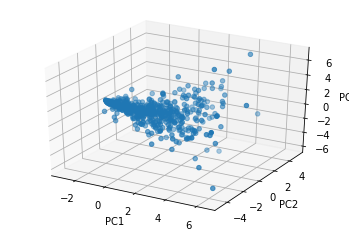

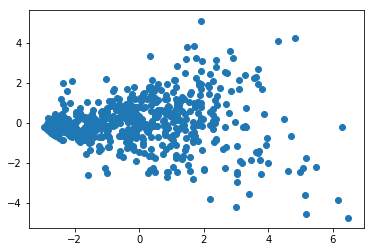

In [23]:
from mpl_toolkits.mplot3d import Axes3D
import matplotlib.pyplot as plt

fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')

ax.scatter(principalDf['principal component 1'], principalDf['principal component 2'], principalDf['principal component 3'])

ax.set_xlabel('PC1')
ax.set_ylabel('PC2')
ax.set_zlabel('PC3')

plt.show()

plt.scatter(principalDf['principal component 1'], principalDf['principal component 2'])


# Principle component analysis for features most correlated with mood

In [38]:
features_subset = ['activity', 'appCat.communication', 'appCat.entertainment', 'appCat.game', 
            'appCat.office', 'appCat.other', 'circumplex.arousal']
x_subset = data2.loc[:, features_subset].values
x_subset = StandardScaler().fit_transform(x)

y = data2.loc[:,['mood']].values

pca = PCA(n_components=3)
principalComponents_subset = pca.fit_transform(x_subset)
principalDf_subset = pd.DataFrame(data = principalComponents_subset
             , columns = ['principal component 1', 'principal component 2', 'principal component 3'])

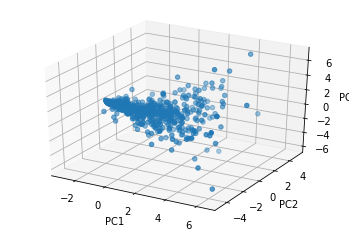

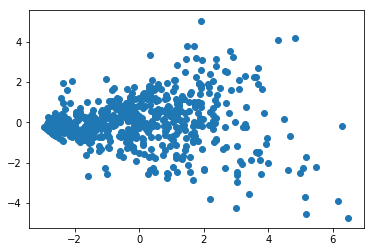

In [39]:
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')

ax.scatter(principalDf_subset['principal component 1'], principalDf_subset['principal component 2'], principalDf_subset['principal component 3'])

ax.set_xlabel('PC1')
ax.set_ylabel('PC2')
ax.set_zlabel('PC3')

plt.show()

plt.scatter(principalDf_subset['principal component 1'], principalDf_subset['principal component 2'])


# Decision Tree - Mood measurement data

In [27]:
from sklearn.ensemble import RandomForestRegressor

df = df.astype(float)

train_set, test_set = create_sets(df, 0.8, False)

X_train = train_set.drop('mood', axis=1)
y_train = train_set.mood

X_test = test_set.drop('mood', axis=1)
y_test = test_set.mood

X_train.shape, y_train.shape, X_test.shape

rf = RandomForestRegressor(n_jobs = 10)

rf.fit(X_train, y_train)

print(rf.feature_importances_)

rf.score(X_train, y_train)

print_score(rf)


NameError: name 'create_sets' is not defined

# Decision Tree/Random forest - Daily data

In [36]:
from sklearn.ensemble import RandomForestRegressor

data2 = data2.astype(float)

train_set, test_set = create_sets(data2, 0.8, True)

X_train = train_set.drop('mood', axis=1)
y_train = train_set.mood

X_test = test_set.drop('mood', axis=1)
y_test = test_set.mood

X_train.shape, y_train.shape, X_test.shape

rf = RandomForestRegressor(n_jobs = 100)

rf.fit(X_train, y_train)

print(rf.feature_importances_)

rf.score(X_train, y_train)

print_score(rf, X_train, y_train, X_test, y_test)



C:\Users\corma\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


[6.118432e-02 2.106037e-02 2.876732e-02 5.981770e-02 4.475568e-03 6.558432e-03 3.170620e-02 4.533206e-02 3.284036e-02
 3.613161e-02 1.436031e-02 7.804841e-03 4.352639e-03 4.021708e-02 3.861868e-02 2.480142e-02 4.090333e-01 9.435988e-02
 7.929663e-04 6.753378e-03 1.273807e-03 2.893705e-03 1.184361e-03 7.031164e-03 2.628065e-03 1.076249e-03 5.458451e-03
 5.534049e-03 3.899859e-03 5.181054e-05 0.000000e+00]
['RMSE on training: ', 0.1977869628133138, 'RMSE on test: ', 0.3980920030462727, 'R^2 on training: ', 0.8965985328716921, 'R^2 on test: ', 0.43403387711600516]


# Boosted trees

# Individual models (ARIMA?)